In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [23]:
RESULT_DIR = "results/test_run"
with open(f'{RESULT_DIR}/conf.pkl', 'rb') as f:
    CONST = pickle.load(f)
    assert RESULT_DIR == CONST['RESULT_DIR']

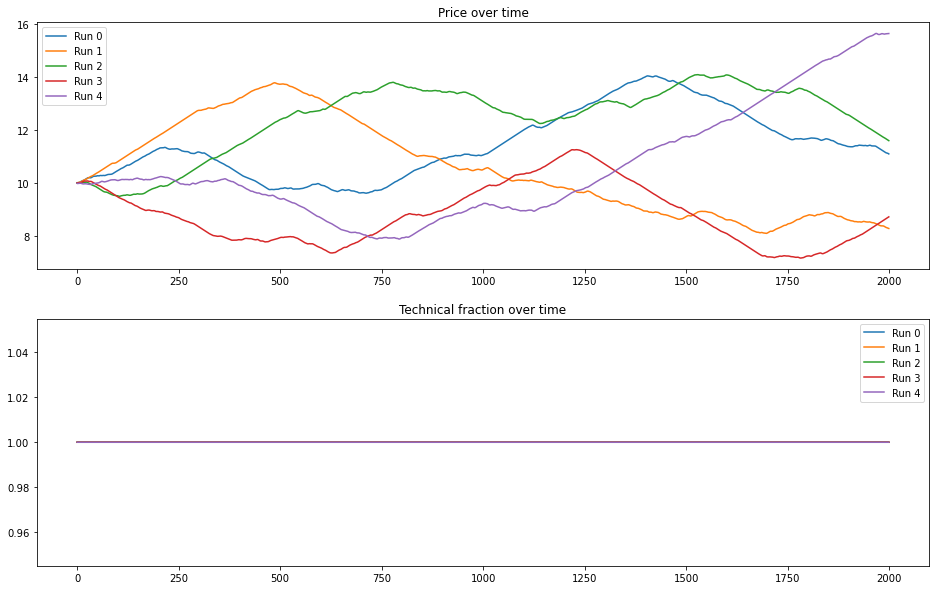

In [24]:
df_list: list[pd.DataFrame] = [pd.read_pickle(f"{RESULT_DIR}/Model_vars_{i}.pkl") for i in range(CONST['N_RUNS'])]
df_list = [df.rolling(5, min_periods=1).mean() for df in df_list]

fig , ax = plt.subplots(2,1, figsize=(16, 10))

ax[0].set_title('Price over time')
ax[1].set_title('Technical fraction over time')
for i, model_df in enumerate(df_list):
    ax[0].plot(model_df.price, label=f'Run {i}')

    ax[1].plot(model_df.technical_fraction, label=f'Run {i}')

ax[0].legend()
ax[1].legend()



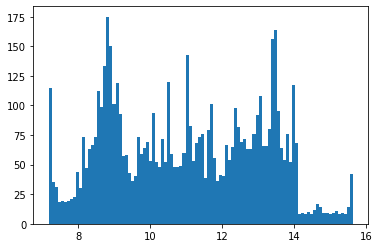

In [25]:
final_price_series = pd.Series(dtype=float)
for df in df_list:
    final_price_series = final_price_series.append(df.price.iloc[800:])

n, bins, patches = plt.hist(final_price_series, 100)


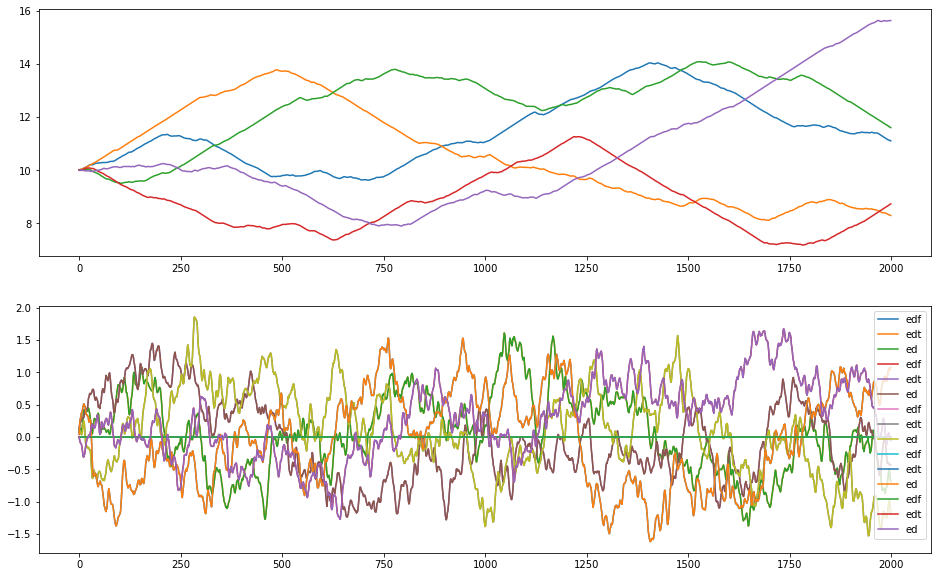

In [26]:
fig , ax = plt.subplots(2,1, figsize=(16, 10))

for model_df in df_list:

    edt = (model_df.tech_optimists - model_df.tech_pessimists) * CONST['tc']  # excess technical demand
    edf = model_df.nf * CONST['gamma'] * (CONST['pf'] - model_df.price)

    model_df["edt"] = edt
    model_df["edf"] = edf
    model_df["ed"]  = edt + edf

    ax[0].plot(model_df.price)
    ax[1].plot(model_df.edf, label="edf")
    ax[1].plot(model_df.edt, label="edt")
    ax[1].plot(model_df.ed, label="ed")
    ax[1].legend()

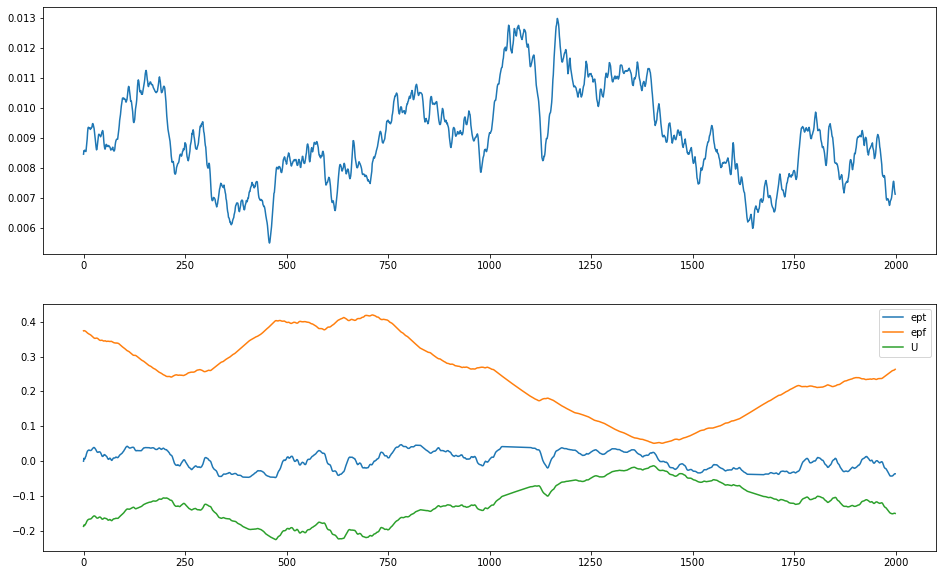

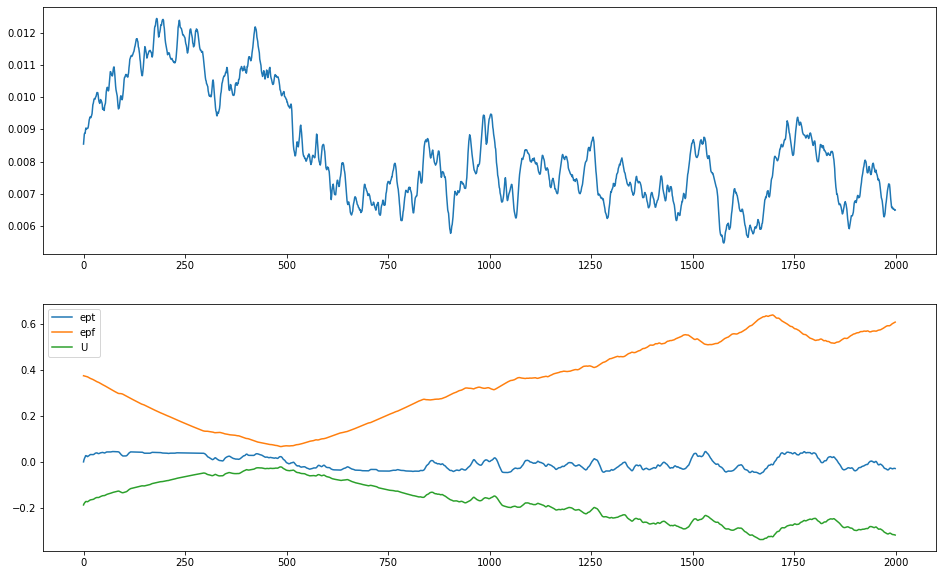

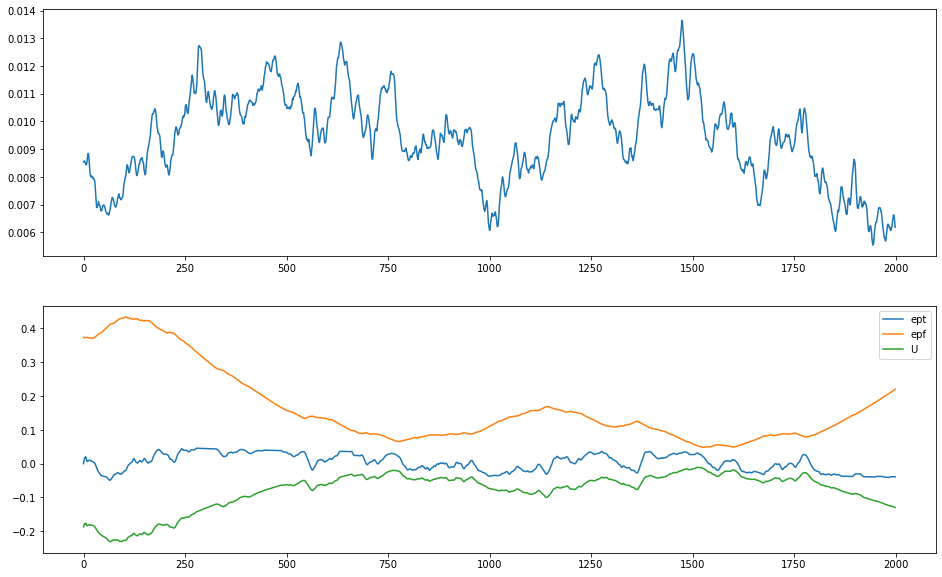

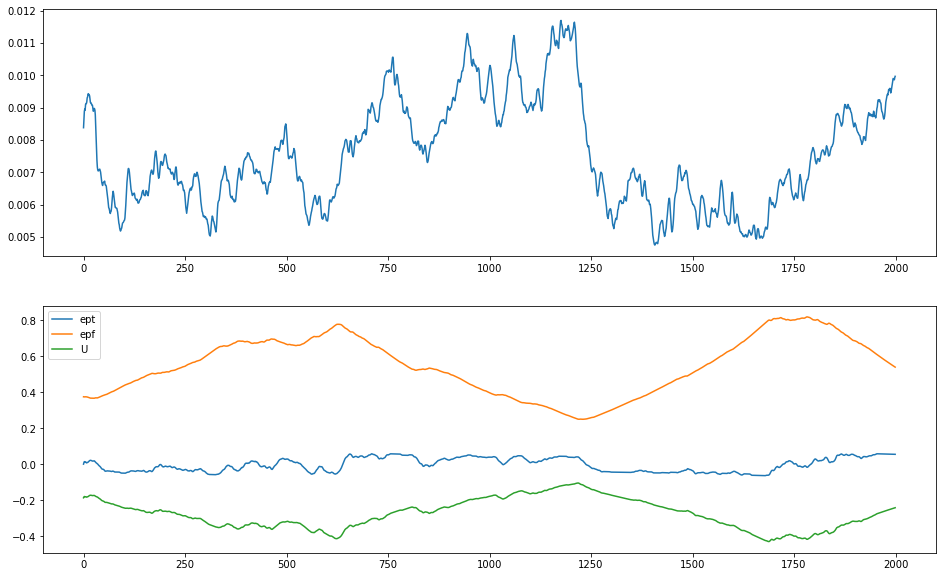

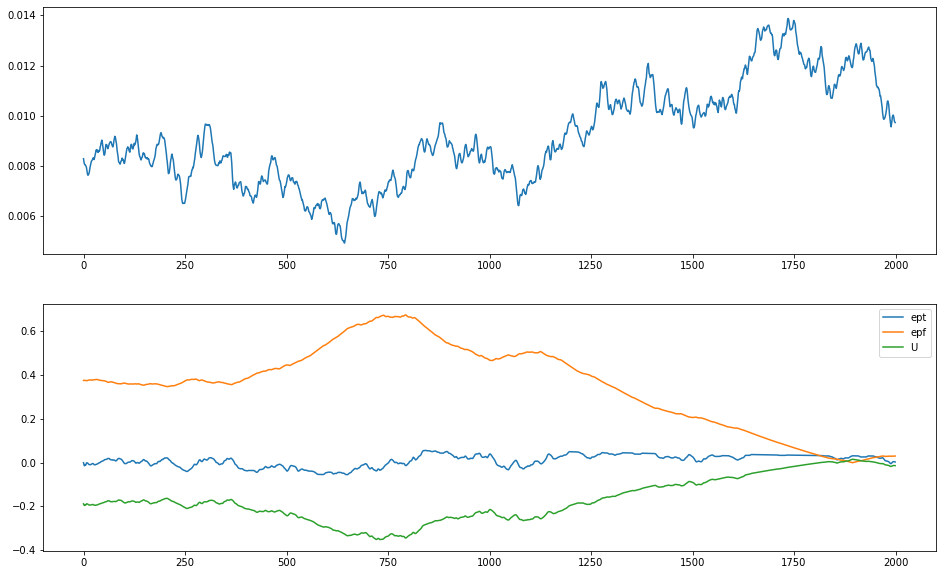

In [27]:
for model_df in df_list:
    ept = (CONST['r'] + model_df.slope / CONST['v2']) / model_df.price - CONST['R']
    epf = CONST['s'] * abs((model_df.price - CONST['pf']) / model_df.price)

    U = CONST['a3'] * (ept - epf)
    p_transition = CONST['v2'] * model_df.tech_optimists / CONST['N'] * np.exp(U) * CONST['DT']
    fig, ax = plt.subplots(2, 1, figsize=(16,10))

    ax[0].plot(p_transition)
    ax[1].plot(ept, label="ept")
    ax[1].plot(epf, label="epf")
    ax[1].plot(U, label="U")
    ax[1].legend()